In [ ]:
"""
1: The Goal of the Dataset:
The goal of this dataset is to predict the likelihood of a patient experiencing a stroke
based on various health and demographic factors.
"""


In [2]:
"""
2: The Source of the Dataset:
Source: [Kaggle - Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)
"""
from google.colab import drive
drive.mount('/content/drive')

# Define the dataset path in your Google Drive
file_path = "/content/drive/MyDrive/Dataset/healthcare-dataset-stroke-data.csv"


Mounted at /content/drive


In [3]:
"""
3: General Information:
- Rows: Each row represents a single patient.
- Columns: Demographic and medical attributes.
- Target Variable: 'stroke' (0 = No, 1 = Yes)
"""

import pandas as pd

# Load dataset
df = pd.read_csv(file_path)

# Display dataset information
print("Dataset Loaded Successfully!\n")
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])
print("Column Names:", df.columns.tolist(), "\n")
print("Data Types:")
print(df.dtypes)




Dataset Loaded Successfully!

Number of Rows: 5110
Number of Columns: 12
Column Names: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'] 

Data Types:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


Samples of the raw dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Statistical Summary:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Missing Values per Column:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64 

Missing values using heatmap:


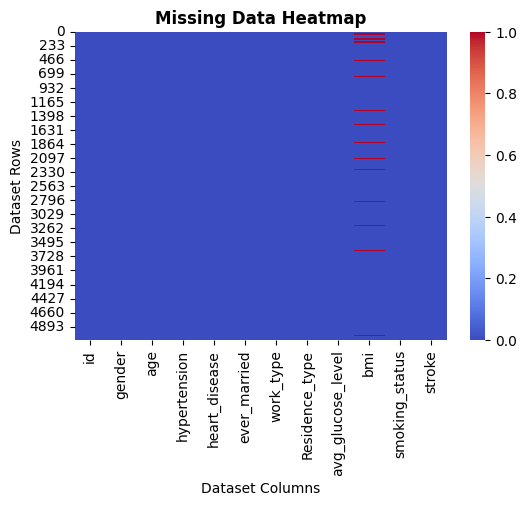

Stroke Distribution: 


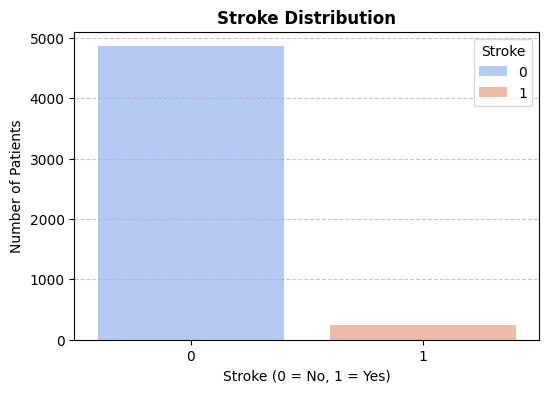

Age Distribution by Stroke Status:


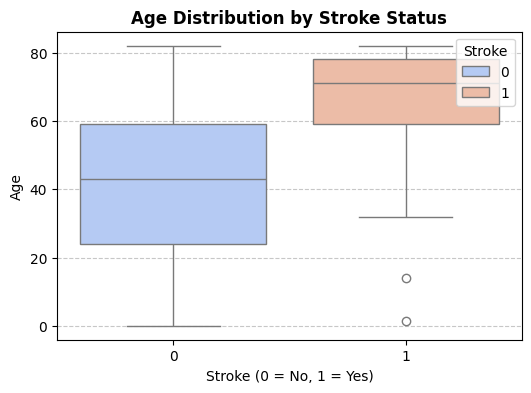

In [4]:
# 4: Summary of the Dataset

# Display samples of the raw dataset (first 5 rows)
print("Samples of the raw dataset:")
display(df.head())

# Display statistical summary
print("Statistical Summary:")
display(df.describe())

import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_vals = df.isnull().sum()
print("Missing Values per Column:\n", missing_vals, "\n")

# Visualize missing values using heatmap
print("Missing values using heatmap:")
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cbar=True, cmap='coolwarm', linecolor="lightgray" )
plt.title('Missing Data Heatmap' , fontweight="bold" )
plt.xlabel("Dataset Columns")
plt.ylabel("Dataset Rows")
plt.show()

# Visualize Stroke Distribution
print("Stroke Distribution: ")
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df, hue='stroke', palette='coolwarm', dodge=False)
plt.title("Stroke Distribution" ,fontweight="bold")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.legend(title="Stroke", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize Age Distribution by Stroke Status
print("Age Distribution by Stroke Status:")
plt.figure(figsize=(6, 4))
sns.boxplot(x='stroke', y='age', data=df, hue='stroke', palette='coolwarm', dodge=False)
plt.title("Age Distribution by Stroke Status" ,fontweight="bold")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.legend(title="Stroke", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [20]:
# 5: Preprocessing Techniques

# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
from sklearn.preprocessing import MinMaxScaler  # For feature scaling

# Load the dataset from the specified file path in Google Drive
file_path = "/content/drive/MyDrive/Dataset/healthcare-dataset-stroke-data.csv"
data = pd.read_csv(file_path)

# ----------------------------------------
# 1️⃣ Drop Unnecessary Columns
# ----------------------------------------
# Remove the 'id' column as it does not provide useful information for analysis.
data = data.drop(columns=['id'])

# ----------------------------------------
# 2️⃣ Handle Gender Column
# ----------------------------------------
# Keep only rows where 'gender' is 'Male' or 'Female' (removes 'Other' category if present)
data = data[data['gender'].isin(['Male', 'Female'])]

# Convert 'gender' column into binary representation (Keep both Male & Female)
data = pd.get_dummies(data, columns=['gender'])  # Removed drop_first=True

# ----------------------------------------
# 3️⃣ Handle Work Type & Residence Type
# ----------------------------------------
# Convert 'work_type' column into binary categories (Keep all work types)
data = pd.get_dummies(data, columns=['work_type'])  # Removed drop_first=True

# Convert 'Residence_type' column into binary categories (Keep both Rural & Urban)
data = pd.get_dummies(data, columns=['Residence_type'])  # Removed drop_first=True

# ----------------------------------------
# 4️⃣ Handle Missing Values
# ----------------------------------------
# Fill missing values in 'bmi' column with the mean BMI
data.loc[:, 'bmi'] = data['bmi'].fillna(data['bmi'].mean())

# ----------------------------------------
# 5️⃣ Handle Smoking Status
# ----------------------------------------
# Remove rows where 'smoking_status' is 'Unknown'
data = data[data['smoking_status'] != 'Unknown']

# Convert 'smoking_status' column into binary categories (Keep all smoking statuses)
data = pd.get_dummies(data, columns=['smoking_status'])  # Removed drop_first=True

# ----------------------------------------
# 6️⃣ Convert Categorical Variables to Numeric
# ----------------------------------------
# Replace 'ever_married' column with binary values: No (0), Yes (1)
data['ever_married'] = data['ever_married'].map({'Yes': 1, 'No': 0})

# ----------------------------------------
# 7️⃣ Convert Boolean Columns (True/False → 1/0)
# ----------------------------------------
# Identify boolean columns and convert them to integers (1 for True, 0 for False)
for col in data.select_dtypes(include=['bool']).columns:
    data[col] = data[col].astype(int)

# ----------------------------------------
# 8️⃣ Normalize Numerical Columns
# ----------------------------------------
# Initialize MinMaxScaler to scale numerical values between 0 and 1
scaler = MinMaxScaler()

# Define numeric columns to be scaled
numeric_cols = ['bmi', 'age', 'avg_glucose_level']

# Apply MinMaxScaler to the selected numeric columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# ----------------------------------------
# 9️⃣ Save the Processed Dataset
# ----------------------------------------
# Define the output file path in Google Drive
output_file_path = "/content/drive/MyDrive/Dataset/Preprocessed_Healthcare_Data.csv"

# Save the cleaned and processed dataset as a CSV file
data.to_csv(output_file_path, index=False)

# Print success message
print(f"✅ Preprocessed dataset saved at: {output_file_path}")


✅ Preprocessed dataset saved at: /content/drive/MyDrive/Dataset/Preprocessed_Healthcare_Data.csv
